# Learning from Data

## Workshop 1

This initial workshop is introductory.  It's aim is to make sure that you
know how to use the IPython notebooks and to give you a little practice with some of the
ideas from the first couple of lectures.

This workshop will not be formally assessed.  However, if you write a
report on it, I will mark it and give you feedback on it as if it were an
assessed workshop.   In an assesed workshop you should work through the cells, writing
up what you did, including results and your analysis and comments on the results into the notebook itself.  You should then submit a printed copy of the notebook (either by printing it directly or by generating LaTeX and editing that).

Your report will be assessed against the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

If you do want some formative feedback on this workshop, please hand it to
me at a lecture or give it in at the next workshop.

----

## IPython notebooks

Make sure that you've done the  "Exeter_intro.ipynb" and "Numpy and Pylab" notebooks.  

## Supervised and unsupervised learning

For each of the following tasks, decide whether they are supervised or unsupervised, and if they are supervised decide whether are they regression or classification tasks.


* Given records (amount spent, the goods purchased, the merchant,
    whether chip and pin or signature, the country, etc) of fraudulent and
    genuine credit card transactions for a year, decide whether a new
    transaction is genuine or fraudulent.
    <br>**A: It is a supervised classification task if it is known which transactions in the training set were fraudulent and which were genuine. Otherwise it is an unsupervised learning task.**


* Given the heights, body mass indices and dietary details of
    different peoples around the world, predict the height and body mass of
    an ancient tribe from preserved details of their diet.
    <br>**A: It is an unsupervised learning task since no "correct" output information exists regarding height and body mass of the ancient tribe, only their deit information is available . However, if their body mass info was available, it would be a supervised regression task.**
   
   
* Given video footage of potatoes and clods of earth passing down a
    conveyor belt, write a program to control a robot arm that sorts
    potatoes from earth.
    <br>**A: This is not a supervised learning task since no "correct" output information is gieven to the machine. The solution to the task can be approached using semi-supervised learning or reinforcement learning where a human for example 'rewards' the machine when that machine takes a "correct" action.**
    
    
* Given records on peoples social networking habits (who they Twitter
    at, what they Twitter about, who they link to on FaceBook, etc), decide
    how many on-line communities there are.
    <br>**A: It is a supervised classification learning task if it is possible to access the list of communities they belong to.**
    
    
* Given the records of credit card transactions, find an informative
    two-dimensional visualisation of the data.
    <br>**A: This is not a supervised learning task since no information is fed into the machine regarding what an *informative* visualisation of the data looks like. The solution to the task can be approached using semi-supervised learning or reinforcement learning where a human for example 'rewards' the machine when that machine finds an informative two-dimensional visualisation.**
    
    
* This question.

## Scatter plots of the tremor data

Download the tremor data from the following URL.  You could do this by downloading it via a browser into the directory where your IPython notebooks are, but it is probably easiest to download it using curl from the notebook:

In [1]:
!curl http://empslocal.ex.ac.uk/people/staff/reverson/ECM3420/tremor.txt -o tremor.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26931  100 26931    0     0   178k      0 --:--:-- --:--:-- --:--:--  180k


In [4]:
# Check the files in the current diretory to see if it's there
!ls

Connecting with the Qt Console.ipynb      Importing Notebooks.ipynb                 Notebook Security.ipynb                   Typesetting Equations.ipynb               Working With Markdown Cells.ipynb         workshop1.ipynb
Converting Notebooks With nbconvert.ipynb Index.ipynb                               Numpy and pylab.ipynb                     Untitled0.ipynb                           images
Custom Keyboard Shortcuts.ipynb           JavaScript Notebook Extensions.ipynb      Running Code.ipynb                        Using nbconvert as a Library.ipynb        mandelbrot.png
Exeter_intro.ipynb                        Notebook Basics.ipynb                     Running the Notebook Server.ipynb         What is the IPython Notebook.ipynb        tremor.txt


Then load the data into an array X.  This should have 3 columns and 357 rows.  The first two columns correspond to the features while the last column is the corresponding label or target which is either 0 or 1 depending on whether the features in that row correspond to a normal person or someone with an abnormal tremor.

In [3]:
%pylab inline
tremor = loadtxt('tremor.txt')
print "shape: " + str(tremor.shape)

print tremor[:10]             # First 10 rows

Populating the interactive namespace from numpy and matplotlib
shape: (357, 3)
[[ 0.94617791  0.95960454  1.        ]
 [ 0.32668859  0.89366556  1.        ]
 [ 0.38581043  0.89719882  1.        ]
 [ 0.43452443  0.90253512  1.        ]
 [ 0.97416266  0.92591583  1.        ]
 [ 0.92458866  0.93143823  1.        ]
 [ 0.93545201  0.91699704  1.        ]
 [ 0.93088507  0.95134854  1.        ]
 [ 0.44432051 -0.16738003  1.        ]
 [-0.00411436 -0.07002807  1.        ]]


Split the data up into features and targets

In [4]:
X = tremor[:,:2]
t = tremor[:,2]

In [5]:
# Check the variables with whos
%whos


Variable   Type        Data/Info
--------------------------------
X          ndarray     357x2: 714 elems, type `float64`, 5712 bytes
knn        function    <function knn at 0x1066632a8>
scipy      module      <module 'scipy' from '/Us<...>ages/scipy/__init__.pyc'>
t          ndarray     357: 357 elems, type `float64`, 2856 bytes
tremor     ndarray     357x3: 1071 elems, type `float64`, 8568 bytes


### A scatter plot

Plot the data according to the labels

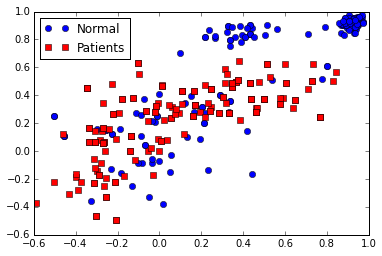

In [6]:
normal = t == 1
patient = t == 0

# print X[normal,0]
# print "===="
# print X[patient,1]

# Seva:
# `X[normal,0]` get x-values of members of X that map to true in normal array
# `X[normal,1]` get y-values of members of X that map to true in normal array
#  same for patient array

plot(X[normal,0], X[normal,1], 'bo', label='Normal')
plot(X[patient,0], X[patient,1], 'rs', label='Patients')
legend(loc=2)

# Seva:
# What we did here: got x,y pairs from `X` that map to t == 0 in `tremor` and got x,y pairs from `X` that map to t == 1 in `tremor`
# Ploted 2 resulting data sets against each other

<matplotlib.colorbar.Colorbar instance at 0x1076da998>

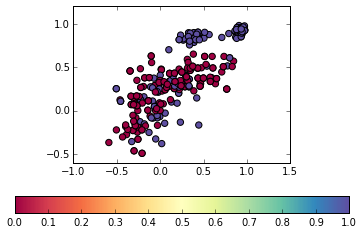

In [7]:
# An alternative way of plotting that colours the markers according to the value of t
scatter(X[:,0], X[:,1], s=40, c=t, cmap=cm.Spectral)
axis('scaled')
colorbar(orientation='horizontal')

Make sure you understand the way the above works.  Print the values of the variables is you're not sure and use help etc to find out about plot and scatter.

## $k$-nearest neighbour classifier

The object of this exercise is to write a $k$-nearest neighbour classifier.  We will split the data into a training set and a test set.

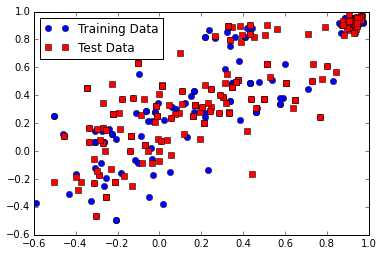

In [8]:
from random import shuffle
N = len(t)
I = range(N)
shuffle(I)       # Shuffle the indices in place


# First half for training and second for testing
tr = I[:N//2]
te = I[N//2:]

Xtr = X[tr,:]
# ttr = X[tr]
# I think a mistake was made with `ttr = X[tr]`, it should be:
ttr = t[tr]

Xte = X[te,:]
tte = t[te]

# % whos

plot(Xtr[:,0], Xtr[:,1], 'bo', label='Training Data')
plot(Xte[:,0], Xte[:,1], 'rs', label='Test Data')
legend(loc=2)

Plot your training and test sets to make sure that they look like a fair random division of the data. 

The training data are to be used to construct the classifier. The test data, which should not be used at all during training, are used to evaluate how well the classifier works.

Write a Python function 
```python
    knn(Xtr, ttr, X, k)
```
that takes training data <code>Xtr</code> and <code>ttr</code> and classifies each of the features in <code>X</code> with the given <code>k</code>.

Assume that the targets have values 0 or $1$. Each feature  in <code>X</code> should
to be classified into one of the two classes based on the how many of its <code>k</code> nearest neighbours belong to each class.   Your function
should return a vector of 0s and 1s, one for each feature (row) of <code>X</code>.



####Hints

* You will need to find the distances of every point in <code>X</code> to every point in <code>Xtr</code> so that you can then find the nearest neighbours.  The function <code>scipy.spatial.distance.cdist(X, Y)</code> will find all the distances between the vectors that form the rows of <code>X</code> and <code>Y</code>. 

* Try using <code>cdist</code> to find the matrix of distances between, say <code>X</code> and <code>Xtr</code> and plot the result using <code>imshow</code>.

* Having found all the distances, you can use the <code>argsort</code> function to find the indices of the sorted elements of each row.  For example, let's make a pretend row of the matrix of distances produced by <code>cdist</code>
```python
 # Make some pretend distances of the observation we want to classify to each of the 6 training observations.
D = rand(6)        
print D
[ 0.90359467  0.77206353  0.67672753  0.92874061  0.01705398  0.62886366]
t = array([1, 1, 0, 0, 1, 0])    # Pretend targets of the training observations
I = argsort(D)
print I
[4 5 2 1 0 3]
```
Notice that the smallest distance is D[4], the second smallest D[5], etc.  So that if $k = 3$ we should classify the observation according to <code>t[4], t[5]</code> and <code>t[2]</code>; namely 1, 0, and 0, so we classify it as class 0.

<matplotlib.colorbar.Colorbar instance at 0x108f13518>

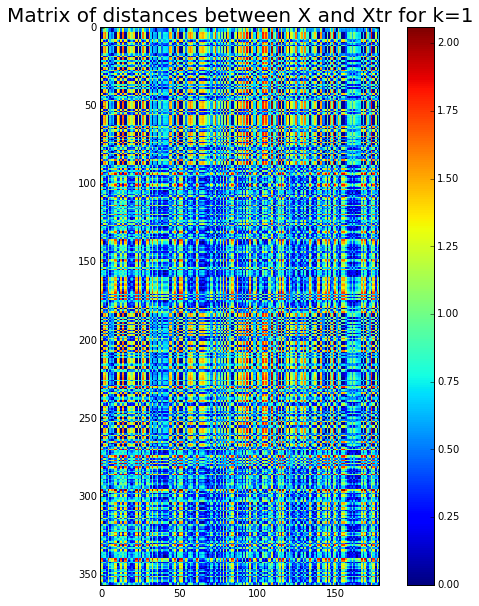

In [11]:
import scipy.stats
import scipy.spatial.distance

# K nearest neighbours classifier
def knn(Xtr, ttr, X, k, plotDistances=False):
    distances = scipy.spatial.distance.cdist(X, Xtr)
    # plot the matrix of distances between X and Xtr if asked
    if plotDistances:
        imshow(distances, interpolation='nearest')
    # tpc: predicated class for each point in Xtr
    tpc = array([]) # instantiate tcp as an ndarray
    for idx, row in enumerate(distances):
        sorted = argsort(row)[:k]
        k_neighbours = ttr[sorted]
        mode_val = scipy.stats.mode(k_neighbours)[0][0]
        tpc = np.append(tpc, mode_val)
    return tpc

# predicted classes for X with k=1
figsize(10, 10)
title('Matrix of distances between X and Xtr for k=1', fontsize=20)
tpc = knn(Xtr, ttr, X, 1, plotDistances=True)
colorbar()

Use your classifier to carry out $k=1$ classification of the
<code>Xte</code> tremor data. As you did for the previous question, plot the
training data according to its class and plot the test data according to
both its true class (from <code>tte</code>) and its predicted class from your
classifier.  Where the predicted class differs from the true class make
sure that you can see from the plot why the classifier has classified the
way it has.

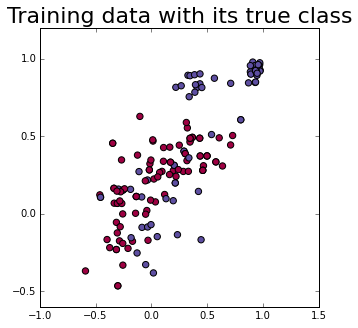

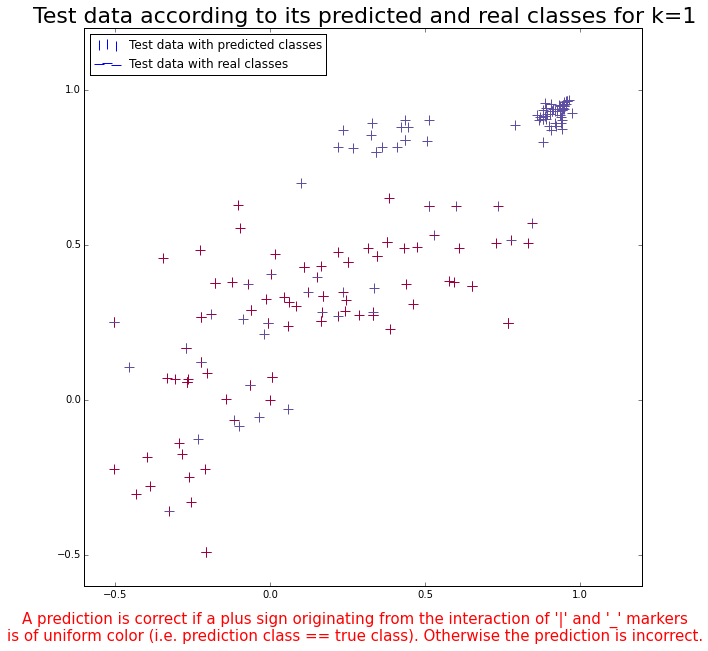

In [486]:
tpc = knn(Xtr, ttr, Xte, 1)
# Plot training and test data for k=1
figsize(5, 5)
title('Training data with its true class', fontsize=22)
scatter(Xtr[:,0], Xtr[:,1], s=40, c=ttr, cmap=cm.Spectral)
figsize(10, 10)
figure()
title('Test data according to its predicted and real classes for k=1', fontsize=22)
scatter(Xte[:,0], Xte[:,1], s=100, c=tpc, cmap=cm.Spectral, marker=u'|', label='Test data with predicted classes')
scatter(Xte[:,0], Xte[:,1], s=100, c=tte, cmap=cm.Spectral, marker=u'_', label='Test data with real classes')
subtitle = "A prediction is correct if a plus sign originating from the interaction of '|' and '_' markers\nis of uniform color (i.e. prediction class == true class). Otherwise the prediction is incorrect."
figtext(0.5,0.05, subtitle, fontsize=15, ha='center', color="red")
legend(loc=2)
figsize(5, 5)

Work out the <i>classification accuracy</i> for your
classifier, that is the fraction of examples in <code>Xte</code> for which  the
classifier predicts the correct class.

In [13]:
def accuracy_for_k(t, knn):
    # divide number of accurate predictions by total number of predictions
    return sum(t == knn) / float(len(t))

print "Accuracy of predictions for k=1: ", accuracy_for_k(tte, knn(Xtr, ttr, Xte, 1))

Accuracy of predictions for k=1:  0.854748603352


Repeat the above for  $k = 3$ and $k = 10$ and give an explanation for
your results.

In [14]:
# Repeat the above for k=3 and k=10 and give an explanation for your results.
print "Accuracy of predictions for k=3: ", accuracy_for_k(tte, knn(Xtr, ttr, Xte, 3))
print "Accuracy of predictions for k=10: ", accuracy_for_k(tte, knn(Xtr, ttr, Xte, 10))

Accuracy of predictions for k=3:  0.837988826816
Accuracy of predictions for k=10:  0.849162011173


> Explanation: The difference in accuracy between k=3 and k=10 seems almost insignificant. The explanation for this may be the fact that the data is roughly divided into 2 obvious clusters each dominated by one of the two classes. As such, the result of classification based on 3 nearest neighbours isn't very different from classification based on 10 nearest neighbours when most points in each cluster are usually of the same class.


Automate the procedure to plot a graph of the
classification accuracy of <code>Xte</code> versus $k$ for $k$ up to about 40.  What's the best $k$ to use?  Why are smaller $k$ worse?  Why are
larger $k$ worse? **Seva: I think it was meant to say: "Why are smaller $k$ *better*?  Why are larger $k$ worse?"**

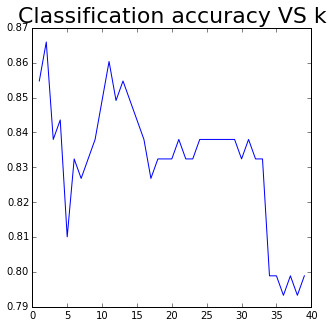

In [16]:
k_arr = array([]) # array of accuracy for different k values
for k in xrange(1, 40):
    accuracy = accuracy_for_k(tte, knn(Xtr, ttr, Xte, k))
    k_arr = append(k_arr, accuracy)
    
figsize(5, 5)
figure()
title('Classification accuracy VS k', fontsize=22)
plot(xrange(1, 40), k_arr)

> Explanation: Evidently $k=4$ yields the highest accuracy results with subsequent increases in $k$ yield lower classification accuracy results that start to sharply decline at around $k=22$. The fact that larger k yield worst classification accuracy can probably be explained by the fact that previously distant clusters of a particular class were undetectable by short $k-ranges$ of points in clusters of another class, but as $k-range$ increased, they started affecting classification of points in other clusters, subsequently reducing accuracy.

> The reason for higher accuracy of smaller $k$ is probably the fact that data is very similar in a short range within the cluster where all points are roughly of the same class.

Now plot the classification accuracy for the <i>training </i> data (that
is call your classifier like <code>knn(Xtr, ttr, Xtr, k)</code>).
Explain the shape of the curve.

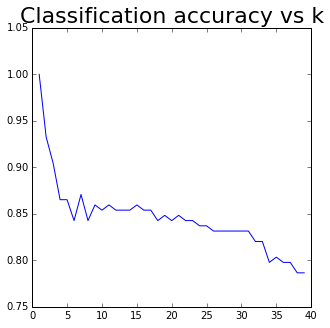

In [493]:
k_arr = array([]) # array of accuracy for different k values
for k in xrange(1, 40):
    accuracy = accuracy_for_k(ttr, knn(Xtr, ttr, Xtr, k))
    k_arr = append(k_arr, accuracy)
    
figsize(5, 5)
figure()
title('Classification accuracy vs k', fontsize=22)
plot(xrange(1, 40), k_arr)

> Explanation: The accuracy for $k$=1 is obviously $100%$. However, as $k$ increases the accuracy of classification declines sharply, but remains pretty accurate at figures above $75%$. The sharp decline can be explained by the fact that even a tiny variation in $k$ produces results that while are pretty accurate ($>75%$) are nevertheless far more different than the true classification.

> The fact that the accuracy quickly stabilizes at $k>5$ and remains witin a $10%$ accuracy range for the rest of the graph can be explained by the fact that the data is roughly divided into 2 obvious clusters each dominated by one of the two classes. As such, increasing $k$ doesn't make much of an impact on accuracy when most points in each cluster are usually of the same class anyways.

> Nevertheless, the classification accuracy continues to decline as $k$ increases and starts declining at a higher rate after $k=33$. This can probably be explained by the fact that previously distant clusters of a particular class were undetectable by short $k-ranges$ of points in clusters of another class, but as $k-range$ increased, they started affecting classification of points in other clusters, subsequently reducing accuracy.